In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset
bikes = pd.read_csv("day.csv",parse_dates = ["dteday"])  #reading the date in proper format

In [4]:
#check the shape
bikes.shape

(730, 16)

In [5]:
#check the data sample
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#checking the info of the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
#checking how many nulls per column
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* Data has no missing values

In [8]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#dropping columns which are either redundant or not useful for model building

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

#registered and casual are SUMMED up into cnt which is our dependent variable
#dteday and instant hold no predictive value
#temp and atemp are similar columns and one of them can be dropped
bikes.drop(columns=["registered","casual","dteday","instant","temp"],inplace=True)

In [10]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [11]:
#Converting the season, weathersit, mnth, weekday to categorical string variables to ensure no hierarchy is mistaken
bikes["season"]= bikes["season"].map({1:"spring", 
                                2:"summer", 
                                3:"fall", 
                                4:"winter"},bikes.season)

bikes["weathersit"] = bikes["weathersit"].map({1:"Clear",
                                         2:"Misty",
                                         3:"Light rain/snow",
                                         4:"Heavy rain/snow"},bikes.weathersit)

bikes["mnth"]= bikes["mnth"].map({1:"Jan", 
                            2:"Feb", 
                            3:"Mar", 
                            4:"Apr",
                            5:"May",
                            6:"Jun",
                            7:"Jul",
                            8:"Aug",
                            9:"Sep",
                            10:"Oct",
                            11:"Nov",
                            12:"Dec"},bikes.mnth)

bikes["weekday"]=bikes["weekday"].map({0:"Sunday",
                                 1:"Monday",
                                 2:"Tuesday",
                                 3:"Wednesday", 
                                 4:"Thursday",
                                 5:"Friday",
                                 6:"Saturday"},bikes.weekday)

In [12]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


In [13]:
#Checking unique values of columns converted above
print(bikes.season.unique())
print(bikes.mnth.unique())
print(bikes.weekday.unique())
print(bikes.weathersit.unique())

['spring' 'summer' 'fall' 'winter']
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
['Misty' 'Clear' 'Light rain/snow']


## Visualizing the data

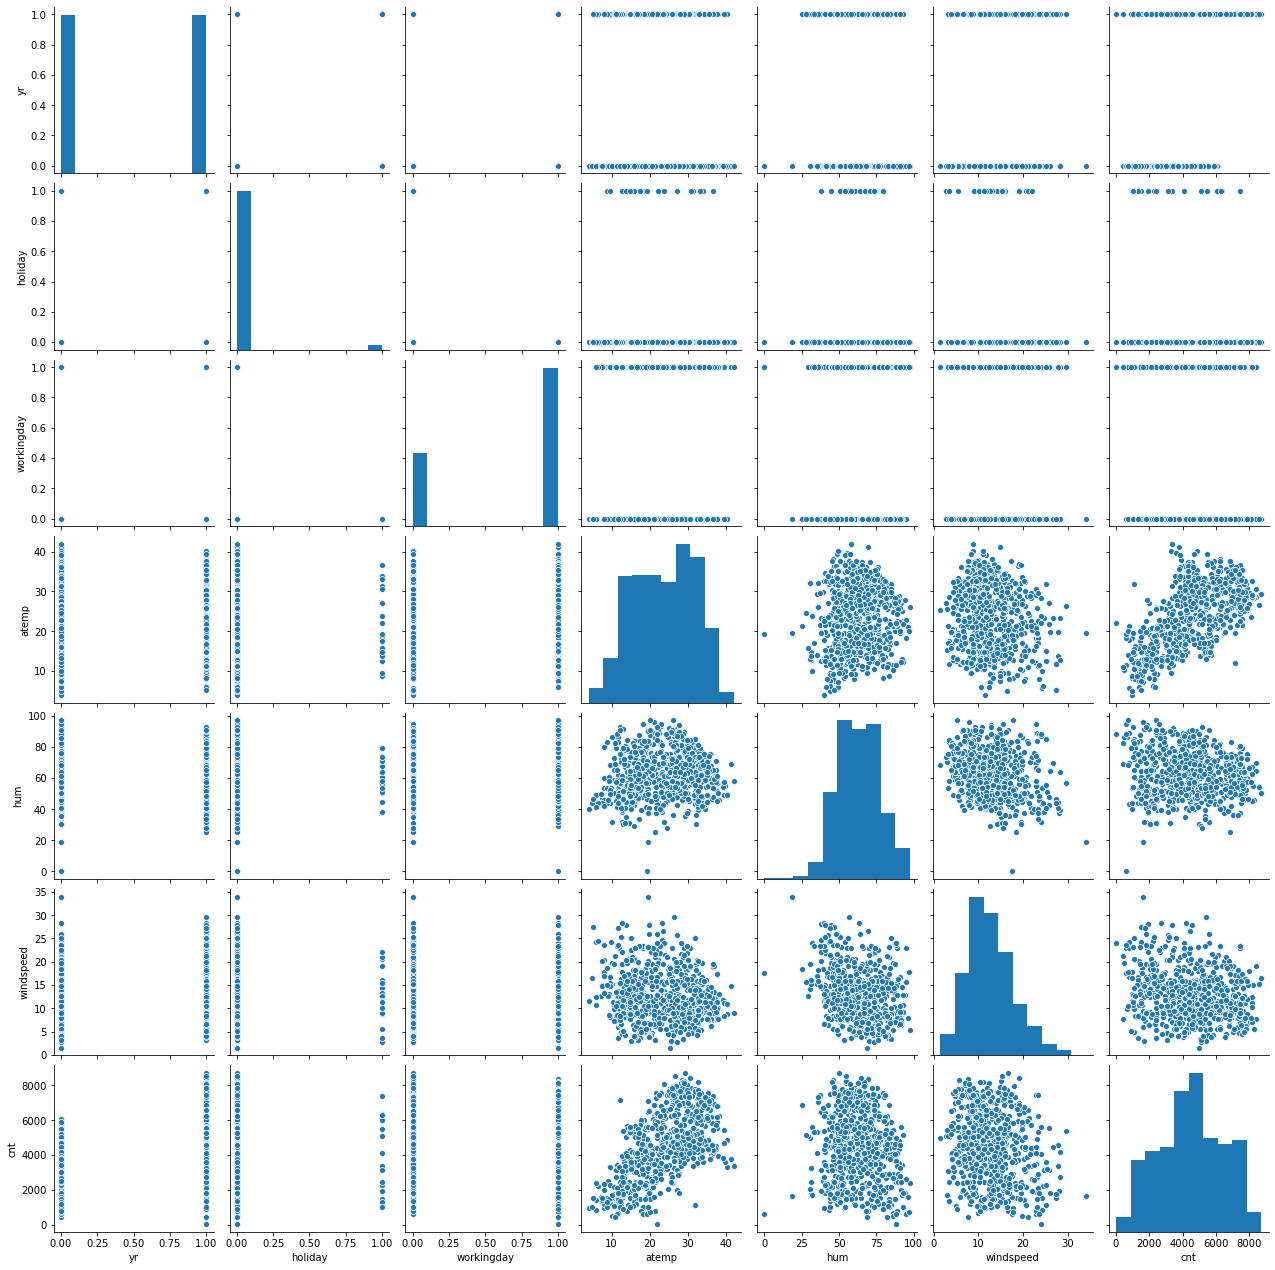

In [14]:
sns.pairplot(bikes, vars = ["yr","holiday","workingday","atemp","hum","windspeed","cnt"])
plt.show()

###### Analyzing the graph above, we notice that some predictor varibales seem positively correalted to "cnt":
* atemp is positively correalted to cnt

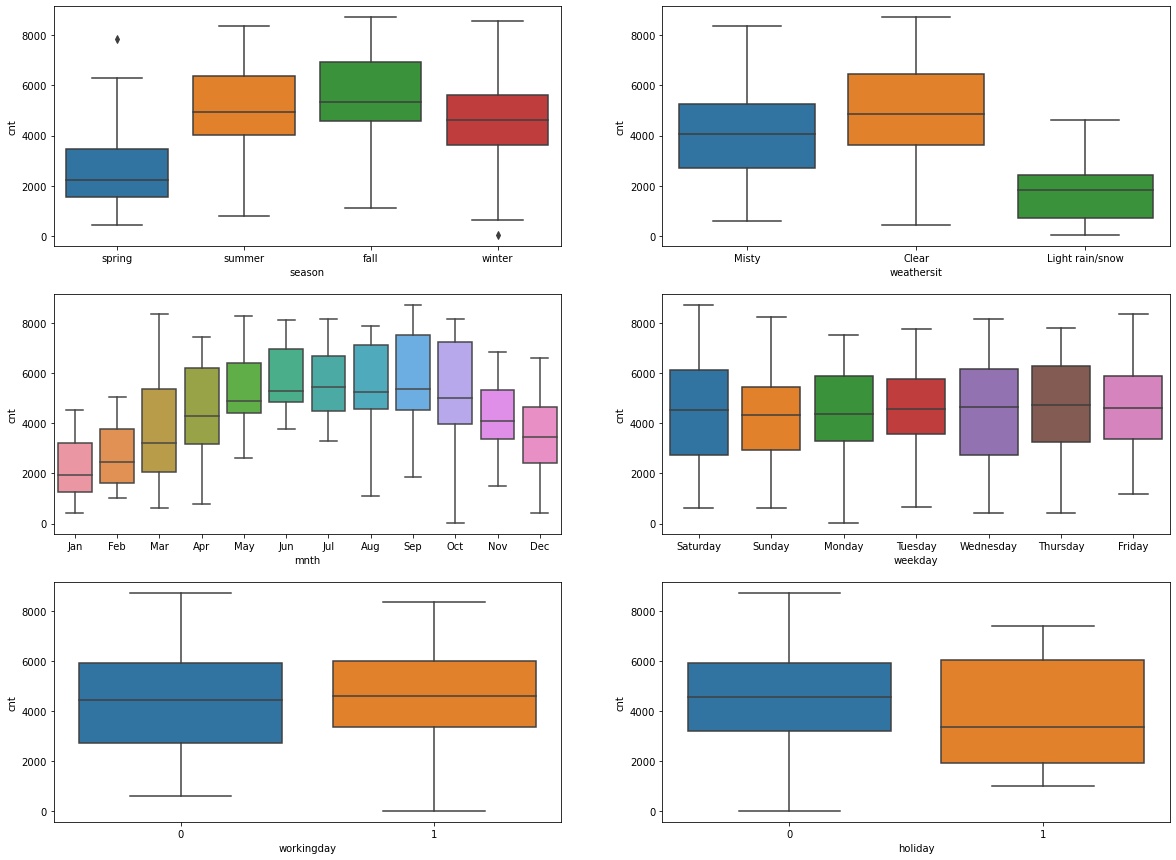

In [15]:
#visualising the categorical variable
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.show()

#### A few observations while looking at the boxplots above:

* The count of rentals go up in summers and fall.
* The count of rentals is higher during Clear weather
* As seen from the weather pattern, we also note that during the summer and fall months (May - Oct) the sale is higher.

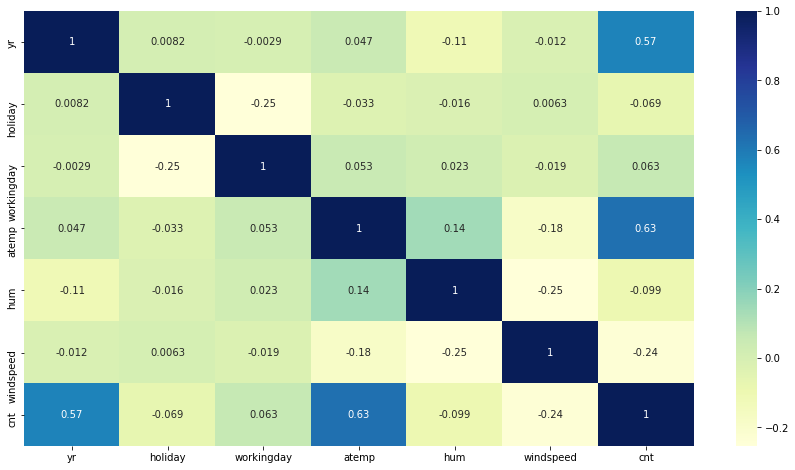

In [16]:
#Visualizing the correlation 
plt.figure(figsize=(15,8))
sns.heatmap(bikes.corr(), cmap ="YlGnBu", annot=True)
plt.show()

##### We note from the above:
* cnt has a high positive correaltion with yr and atemp

###### Creating dummy varibales for the categorical features

In [17]:
#preparing dummy variables for season
season_d = pd.get_dummies(bikes["season"], drop_first=True)
season_d.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


###### As we can notice, the season can be identified by:

- `000` - fall
- `100` - spring
- `010` - summer
- `001` - winter


In [18]:
#getting dummy variables for weathersit
weathersit_d = pd.get_dummies(bikes["weathersit"], drop_first=True)
weathersit_d.head()

,Light rain/snow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [19]:
#checking unique values on the dataset for weathersit
bikes.weathersit.unique()

array(['Misty', 'Clear', 'Light rain/snow'], dtype=object)

###### [Note]: We do not have any record against "Heavy Rain/Snow" weather category.

###### As we can notice, we can keep 2 columns and drop the first and the weather can be identified by:

- `10` - Light rain/snow
- `01` - Misty
- `00` - Mostly Clear


In [20]:
#getting dummy variables for weekday
weekday_d = pd.get_dummies(bikes["weekday"], drop_first=True)
weekday_d.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


###### As we can notice, weekday can be identified by:

- `000000` - Friday
- `000100` - Thursday
- `000001` - Wednesday
- `000010` - Tuesday
- `100000` - Monday
- `001000` - Sunday
- `010000` - Saturday



In [21]:
#getting dummy variables for mnth
mnth_d = pd.get_dummies(bikes["mnth"], drop_first=True)
mnth_d.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


###### As we can notice, after dropping the first column of "Apr" : we can identify it if all the rest 11 columns are = 00000000000

In [22]:
#Concat the above dummy variables to the original dataset
bikes = pd.concat([bikes,weathersit_d, weekday_d, mnth_d, season_d],axis=1)

In [23]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
0,spring,0,Jan,0,Saturday,0,Misty,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,1,0,0
1,spring,0,Jan,0,Sunday,0,Misty,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,1,0,0
2,spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#Now we can drop the old variables that are redundant from the dataset
bikes.drop(["season","weathersit","mnth","weekday"],axis=1,inplace=True)

In [25]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Light rain/snow,Misty,Monday,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the dataset into train test datasets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_train , df_test = train_test_split(bikes, train_size =0.7, random_state=100)

In [28]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling few variables

In [29]:
#importing library
from sklearn.preprocessing import MinMaxScaler

In [30]:
#Instantiate
scaler = MinMaxScaler()

In [31]:
#fitandtransform to all applicable variables
var = ['atemp','hum','windspeed','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [32]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Light rain/snow,Misty,Monday,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


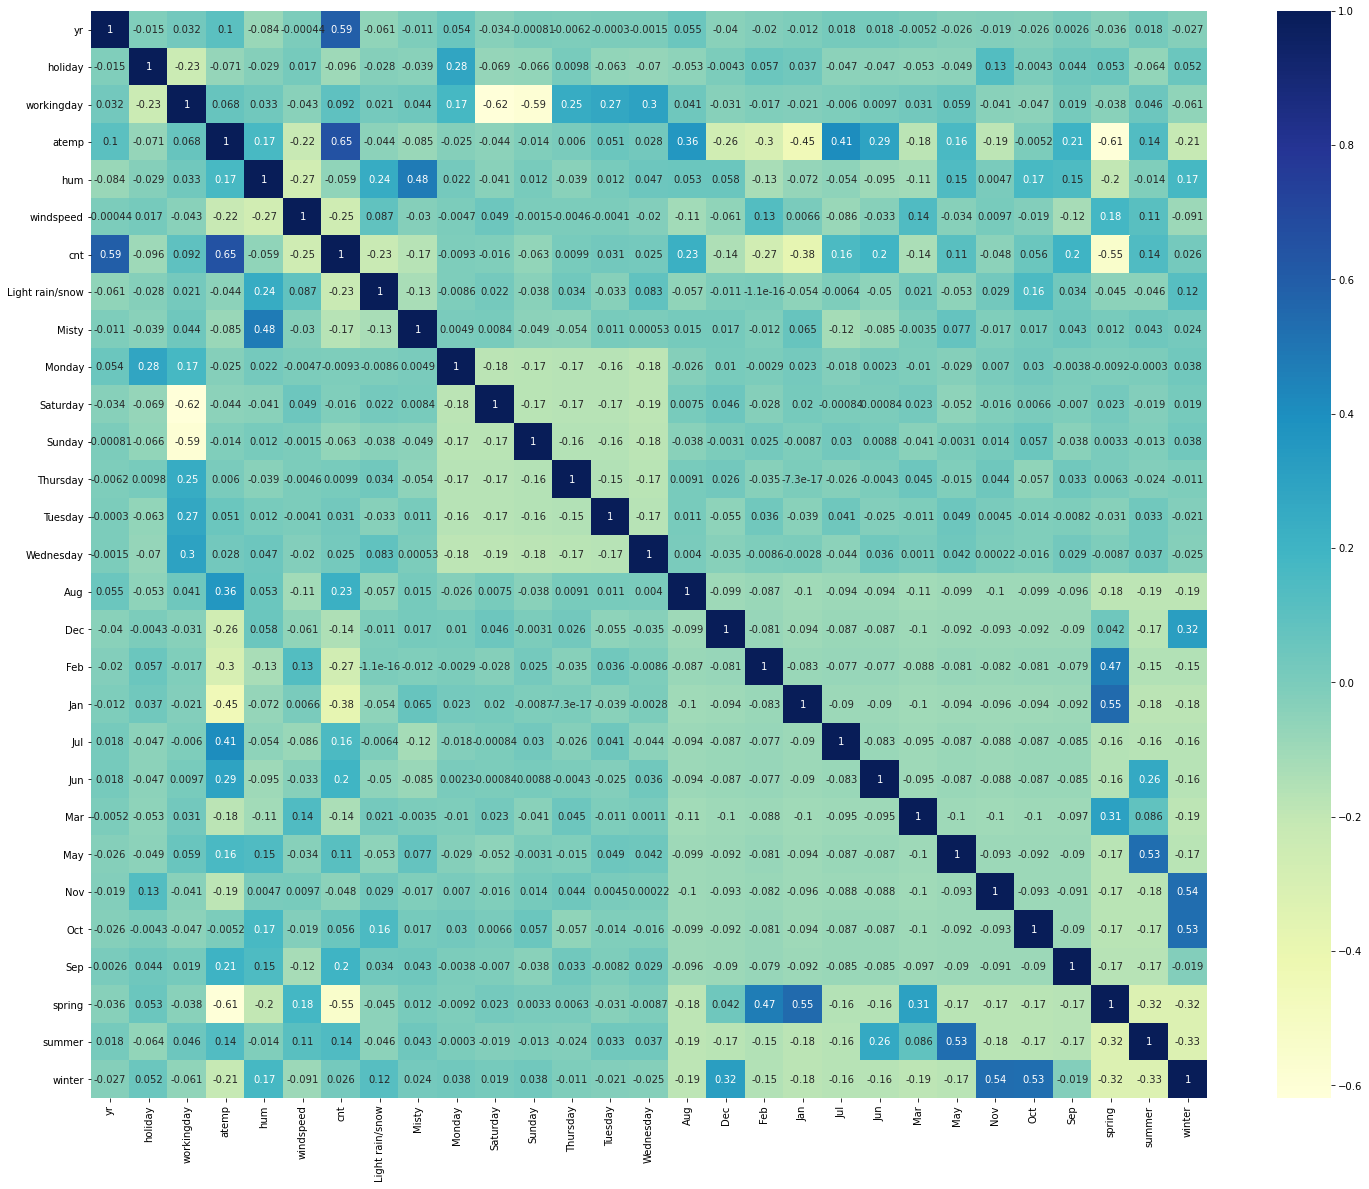

In [33]:
#Checking the correlation
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), cmap= "YlGnBu", annot = True)
plt.show()

In [34]:
#let's see the top correlation in a tablular format
c = df_train.corr().unstack().drop_duplicates().sort_values(ascending=False).apply(lambda x: round(x,2))
c.head(10)

yr     yr        1.00
atemp  cnt       0.65
yr     cnt       0.59
Jan    spring    0.55
Nov    winter    0.54
Oct    winter    0.53
May    summer    0.53
hum    Misty     0.48
Feb    spring    0.47
atemp  Jul       0.41
dtype: float64

## Dividing into X and Y sets

In [35]:
#make a copy of the train dataset
d0 = df_train.copy()

In [36]:
#Creating X and Y train datasets
y_train = d0.pop("cnt")
X_train = d0

In [37]:
X_train.shape

(510, 28)

## Building our model

In [38]:
#Using RFE - Recursive Feature Elimination and Linear Regression to build the model
#importing libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
#Instantiate LinearRegression and fit the X and Y sets
lm = LinearRegression()
lm.fit(X_train,y_train)

#running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [40]:
#Checking RFE values
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light rain/snow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Aug', True, 1),
 ('Dec', False, 3),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 11),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 4),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1)]

In [41]:
#Picking the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'Light rain/snow', 'Misty', 'Saturday', 'Sunday', 'Aug', 'Jan', 'Sep',
       'summer', 'winter'],
      dtype='object')

In [42]:
#Creating a new dataframe for the RFE selected features
X_train_rfe =  X_train[col]

In [43]:
X_train_rfe.shape

(510, 15)

In [44]:
#columns non-selected features
col_d = X_train.columns[~rfe.support_]
col_d

Index(['Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Dec', 'Feb', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'spring'],
      dtype='object')

### Using statsmodels for detailed analysis on the features selected through RFE

In [45]:
#importing libraries
import statsmodels.api as sm

In [46]:
#building the model with features selected through RFE
X_train_rfe = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train,X_train_rfe).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.52e-188
Time:                        23:13:31   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.023     

In [47]:
#defining a function to check VIF
def calc_vif(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # Calculating VIF
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF"] = [round(variance_inflation_factor(x.values, i),2) for i in range(x.shape[1])]
    vif.sort_values(by="VIF",ascending=False, inplace=True)
    return(vif)

In [48]:
#Checking VIF
X_train_rfe = X_train_rfe.drop(columns="const")
print(calc_vif(X_train_rfe))

           Features    VIF
2        workingday  34.11
8          Saturday   8.40
9            Sunday   8.22
1           holiday   2.24
3             atemp   1.91
4               hum   1.89
7             Misty   1.57
14           winter   1.56
11              Jan   1.55
13           summer   1.49
10              Aug   1.42
6   Light rain/snow   1.25
12              Sep   1.22
5         windspeed   1.21
0                yr   1.03


#### Lets drop 'holiday' first as it has high p-value. Then let's see how it affects the other features' p-value and VIF

In [49]:
X_train_n = X_train_rfe.drop("holiday",axis=1)

#building model and checking summary
X_train_n = sm.add_constant(X_train_n)
lr2 = sm.OLS(y_train,X_train_n).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.52e-188
Time:                        23:13:31   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1532      0.037     

###### So we see the adj. R-squared is not changed after dropping the column. Let's check the VIF of remaining features

In [50]:
#Checking VIF
X_train_n = X_train_n.drop(columns="const")
print(calc_vif(X_train_n))

           Features    VIF
3               hum  27.24
1        workingday  16.08
2             atemp  12.35
4         windspeed   4.37
7          Saturday   4.36
8            Sunday   4.27
6             Misty   2.23
0                yr   2.07
13           winter   2.04
12           summer   1.97
10              Jan   1.60
9               Aug   1.56
11              Sep   1.32
5   Light rain/snow   1.22


##### Let's drop 'Sunday' next as the p-value is high and then recheck the model and VIF

In [51]:
X_train_n1 = X_train_n.drop(columns="Sunday")

#building model and checking summary
X_train_n1 = sm.add_constant(X_train_n1)
lr3 = sm.OLS(y_train,X_train_n1).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          6.87e-189
Time:                        23:13:31   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1971      0.030     

In [52]:
#Checking VIF
X_train_n1 = X_train_n1.drop(columns="const")
print(calc_vif(X_train_n1))

           Features    VIF
3               hum  19.69
2             atemp  11.71
1        workingday   4.59
4         windspeed   3.77
6             Misty   2.15
0                yr   2.04
12           winter   2.02
11           summer   1.97
7          Saturday   1.81
8               Aug   1.56
9               Jan   1.56
10              Sep   1.31
5   Light rain/snow   1.19


###### We notice that the column 'Jan' has higher p-value compared to others. Let's drop this column and check the impact.

In [53]:
X_train_n2 = X_train_n1.drop(columns="Jan")

#building model and checking summary
X_train_n2 = sm.add_constant(X_train_n2)
lr4 = sm.OLS(y_train,X_train_n2).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          7.65e-189
Time:                        23:13:31   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1769      0.029     

In [54]:
#Checking VIF
X_train_n2 = X_train_n2.drop(columns="const")
print(calc_vif(X_train_n2))

           Features    VIF
3               hum  16.36
2             atemp   9.83
1        workingday   4.54
4         windspeed   3.76
6             Misty   2.13
0                yr   2.02
10           summer   1.83
7          Saturday   1.79
11           winter   1.74
8               Aug   1.55
9               Sep   1.30
5   Light rain/snow   1.16


#### VIF is very high still for 'hum' - let's drop this column and check the impact

In [55]:
X_train_n3 = X_train_n2.drop(columns="hum")

#building model and checking summary
X_train_n3 = sm.add_constant(X_train_n3)
lr5 = sm.OLS(y_train,X_train_n3).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.15e-186
Time:                        23:13:31   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     498   BIC:                            -916.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0779      0.019     

In [56]:
#Checking VIF
X_train_n3 = X_train_n3.drop(columns="const")
print(calc_vif(X_train_n3))

           Features   VIF
2             atemp  6.02
1        workingday  4.06
3         windspeed  3.45
0                yr  2.02
9            summer  1.83
6          Saturday  1.69
7               Aug  1.55
5             Misty  1.54
10           winter  1.52
8               Sep  1.30
4   Light rain/snow  1.08


###### VIF is very high for a few features, let's drop 'atemp' which has the highest VIF and see how p-values and VIF are affected

In [57]:
X_train_n4 = X_train_n3.drop(columns="atemp")

#building model and checking summary
X_train_n4 = sm.add_constant(X_train_n4)
lr6 = sm.OLS(y_train,X_train_n4).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     93.15
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.31e-107
Time:                        23:13:32   Log-Likelihood:                 307.46
No. Observations:                 510   AIC:                            -592.9
Df Residuals:                     499   BIC:                            -546.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3546      0.021     

###### We see that the model's Adj. R-squared has taken a severe hit. Hence, we should not remove 'atemp' as it is a significant variable for prediction. 
###### The other variables with high VIF are: workingday and windspeed. Judging by the business case importance, we should keep workingday and remove windspeed first.
##### Let us revert to `X_train_n3` and instead of atemp, let's drop 'windspeed' and assess the model

In [58]:
X_train_n5 = X_train_n3.drop(columns="windspeed")

#building model and checking summary
X_train_n5 = sm.add_constant(X_train_n5)
lr7 = sm.OLS(y_train,X_train_n5).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.99e-181
Time:                        23:13:32   Log-Likelihood:                 482.01
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0215      0.016     

In [59]:
#VIF
X_train_n5 = X_train_n5.drop(columns="const")
print(calc_vif(X_train_n5))

          Features   VIF
2            atemp  5.67
1       workingday  3.64
0               yr  1.98
8           summer  1.81
5         Saturday  1.55
4            Misty  1.53
6              Aug  1.53
9           winter  1.51
7              Sep  1.28
3  Light rain/snow  1.07


##### We see that the VIF is still high for atemp. Looking at the remaining features to remove multicolinearity, we can remove 'Aug' (this variable has high correaltion with atemp as seen in the correlation matrix (=0.36) .. Let's see how this affects the model and VIF

In [60]:
X_train_n6 = X_train_n5.drop(columns="Aug")

#building model and checking summary
X_train_n6 = sm.add_constant(X_train_n6)
lr8 = sm.OLS(y_train,X_train_n6).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          6.79e-179
Time:                        23:13:32   Log-Likelihood:                 473.88
No. Observations:                 510   AIC:                            -927.8
Df Residuals:                     500   BIC:                            -885.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0127      0.016     

In [61]:
#Checking VIF
X_train_n6 = X_train_n6.drop(columns="const")
print(calc_vif(X_train_n6))

          Features   VIF
2            atemp  4.58
1       workingday  3.64
0               yr  1.98
5         Saturday  1.55
7           summer  1.55
4            Misty  1.52
8           winter  1.39
6              Sep  1.19
3  Light rain/snow  1.07


###### As expected, the VIF for atemp comes below 5 after removing Aug. We can take `lr8` as our final model because:

* p-values are all within acceptable range.
* The VIF for all remaining features are also in acceptable range (<5).

###### <span style="background:yellow"> Hence, we choose `lr8` as our final model </span>

##### We note that the adj. R-squared is above 0.81, all the p-values are below 0.05 and all the VIF are also below 5. We can proceed with this model <span style='background:yellow'> **lr8** </span> as our final model.

##### Let us now do residual analysis on the dataset

***

## Residual analysis on the train set

In [62]:
#finding the y predicted through the final model
X_train_n6 = sm.add_constant(X_train_n6)
y_train_pred =  lr8.predict(X_train_n6)

In [63]:
#Checking the RSME for the model
from sklearn.metrics import mean_squared_error
print("RSME:")
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))

RSME:
0.09554907530004215


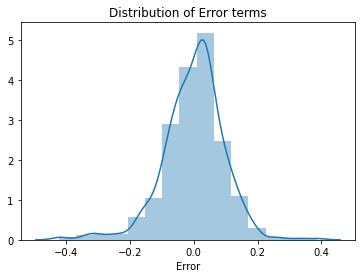

In [64]:
#checking the residuals - to see if the error terms are normally distributed
res = (y_train - y_train_pred)

#plotting the residuals
sns.distplot(res, bins=15)
plt.title("Distribution of Error terms")
plt.xlabel("Error")
plt.show()

##### The Error terms are normally distributed. So we can proceed to make predictions for test set.

In [65]:
X_train_fnl = X_train_n6.drop(columns="const")
col_fnl = X_train_fnl.columns
col_fnl

Index(['yr', 'workingday', 'atemp', 'Light rain/snow', 'Misty', 'Saturday',
       'Sep', 'summer', 'winter'],
      dtype='object')

## Making Predictions on test

In [66]:
#Scaling applicable variables
d1 = df_test.copy()
var = ['atemp','hum','windspeed','cnt']

#transforming the variables
d1[var] = scaler.transform(d1[var])
d1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Light rain/snow,Misty,Monday,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,1,1,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,1,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [67]:
#Dividing into X and Y sets
y_test = d1.pop("cnt")
X_test = d1[col_fnl]

In [68]:
X_test.head()

,yr,workingday,atemp,Light rain/snow,Misty,Saturday,Sep,summer,winter
184,0,0,0.769660,0,1,0,0,0,0
535,1,1,0.842587,0,0,0,0,1,0
299,0,1,0.496145,0,1,0,0,0,1
221,0,1,0.795343,0,0,0,0,0,0
152,0,1,0.741471,0,0,0,0,1,0


In [69]:
#Making predictions
X_test_n = sm.add_constant(X_test)
y_test_pred = lr8.predict(X_test_n)

In [70]:
y_test_pred.head()

184    0.399180
535    0.889551
299    0.419737
221    0.550816
152    0.595474
dtype: float64

## Model Evaluation

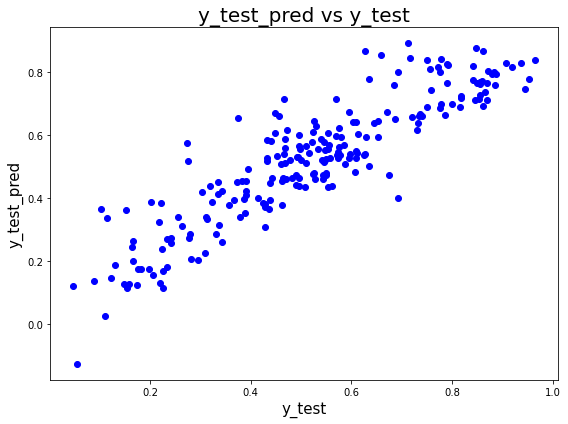

In [71]:
#Checking the spread between y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y= y_test_pred,color ="blue")
plt.title("y_test_pred vs y_test", fontsize = 20)
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_test_pred",fontsize=15)
plt.tight_layout()
plt.show()

##### Finding the corresponding R2 and RSME

In [72]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Calculating the R2- score on test set

In [73]:
print("r2 score:")
print(r2_score(y_test,y_test_pred))

r2 score:
0.802456355753722


#### Calculating the RSME on test set

In [74]:
print("RSME:")
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

RSME:
0.09718748386965624


### We note that the <span style = "background:lightblue"> R2 value and the RSME for the test set is very close to the train set </span><br>

 |R2 / RSME|Train set|Test Set|Diff %|
 |:-:|:-:|:-:|:-:|
 |R2|0.818|0.802|-1.95%|
 |RSME|0.096|0.097|1.04%|


In [75]:
round(lr8.params,4)

const              0.0127
yr                 0.2330
workingday         0.0573
atemp              0.6044
Light rain/snow   -0.2941
Misty             -0.0788
Saturday           0.0657
Sep                0.1035
summer             0.0772
winter             0.1285
dtype: float64

## Equation of our best fit line:

<font size ="3">  <span style = "background:lightgreen"> <i> <b> cnt = 0.0127 + 0.6044 X atemp + 0.2330 X yr + 0.1285 X winter + 0.1035 X Sep + 0.0772 X summer + 0.0657 X Saturday + 0.0573 X workingday  - 0.2941 X Light rain/snow - 0.0788 X Misty </b> </i> </span> </font>

## Interpretations:

1. We have a nice decent model for the demand of bikes from BoomBikes with an adjusted R-sqaured value of 81.5%.
2. The R-squared and the RSME for test dataset is very close to the train dataset - means the model is able to accurately predict the test set.
3. We have narrowed it down to a few significant variables out of which 'atemp' has the highest coefficient of 0.6044, which means that with 1 unit increase in atemp, the cnt increases by 0.6044 units, given that the other variables are constant.
4. We also have a couple of variables with negative coefficients, which means that with the increase in them, the cnt decreases. For example, with a unit increase in Light rain/snow weather, the cnt decreases by 0.2941, given that other variables are constant.

---

## Final Business Recommendations:

- We have seen from the model that the demand in 2019 is better than 2018. This means the company has an upward growth trend. The recent slack in demand could most probably be due to the ongoing Corona pandemic and is expected to back on track post the pandemic.

- We see that increase in feeling temperature has an impact on the bike rental demand. The comapny can focus and build its startegy of offering promotions and offers accordingly.

- BoomBikes can focus more on Summers and Winters as these seasons have a positive effect on the demand.

- Workingdays and Saturdays can be focussed upon more as the demand goes higher on these days. This could most probably be because more office-goers are renting bikes on these days. Company can choose to target this demography with marketing offers.

- Less favourable weather conditions like mist or rain/snow affect the demand negatively. Company can create its marketing startegies around this observation and choose to offer promotions during such weather conditions.


***